In [120]:
import pandas as pd
import numpy as np
from typing import Set, Dict, List
import json
from ast import literal_eval
from collections import defaultdict

%matplotlib inline

In [132]:
SelectedGenres: List[str] = ['Science Fiction', 'Action', 'Drama', 'Thriller', 'Adventure', 'Fantasy', 'Comedy', 'Horror']

In [121]:
# ratings = pd.read_csv('../data/ratings_small.csv')
ratings = pd.read_csv('../data/ratings_small.csv')
metadata = pd.read_csv('../data/movies_metadata.csv');
ratings.head()

/home/sigma/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [122]:
ratings.groupby('userId').count()

,movieId,rating,timestamp
userId,,,
1,20,20,20
2,76,76,76
3,51,51,51
4,204,204,204
5,100,100,100
...,...,...,...
667,68,68,68
668,20,20,20
669,37,37,37


Number of users that ranked at least 50 movies, but less than 300 {tmp.size}


<AxesSubplot:>

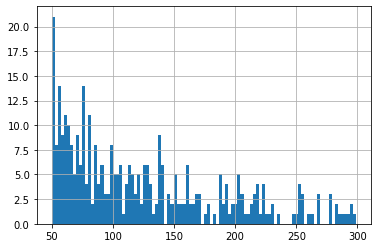

In [123]:
tmp = ratings.groupby('userId')['rating'].count()
tmp = tmp[(tmp >= 50) & (tmp < 300)]
print("""Number of users that ranked at least 50 movies, but less than 300 {tmp.size}""")
tmp.hist(bins=100)

In [124]:
percentileCutoff: float = metadata.vote_count.quantile(0.7)
metadata = metadata[metadata['vote_count'] >= percentileCutoff]
metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45380,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",https://www.netflix.com/title/80171022,432789,tt5990342,en,The Incredible Jessica James,"Burned by a bad breakup, a struggling New York...",...,2017-01-27,0.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Likes are easy, love is hard.",The Incredible Jessica James,False,6.2,37.0
45437,False,NaN,0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,455661,tt6969946,en,In a Heartbeat,A closeted boy runs the risk of being outed by...,...,2017-06-01,0.0,4.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Heart Wants What The Heart Wants,In a Heartbeat,False,8.3,146.0
45441,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,14008,tt0294425,en,Cadet Kelly,Hyperactive teenager Kelly is enrolled into a ...,...,2002-03-07,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Too Cool For The Rules!,Cadet Kelly,False,5.2,145.0
45443,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,49279,tt0000359,fr,L'Homme à la tête de caoutchouc,A chemist in his laboratory places upon a tabl...,...,1901-01-01,0.0,3.0,[],Released,NaN,The Man with the Rubber Head,False,7.6,29.0


In [149]:
class CMovie:
    def __init__(self, id: str, title: str, genres: Set[str]):
        self.id = id
        self.title = title
        self.genres = genres

    def isGenre(self, genre: str):
        return genre in self.genres

    @staticmethod
    def extractGenres(rawObject: str) -> Set[str]:
        result: Set[str] = set()
        arr = literal_eval(rawObject)
        for genre in arr:
            result.add(genre['name'])
        return result

class CUser:
    def __init__(self, id: int) -> None:
        self.id = id
        self.countByGenre: Dict[str, int] = defaultdict(int)

    def countRatingsByGenres(self, ratingsDf, Movies: Dict[str, CMovie]):
        self.countByGenre = defaultdict(int)
        self.totalRatings = 0;
        # TODO highly ineffective - scans all ratings for each user
        for index, row in ratingsDf[ratingsDf.userId == self.id].iterrows():
            if row.movieId not in Movies:
                continue
            for genre in Movies[row.movieId].genres:
                self.countByGenre[genre] += 1
                self.totalRatings +=1

In [150]:
Movies: Dict[str, CMovie] = {}

for index, row in metadata.iterrows():
    Movies[row.id] = CMovie(
        id=row.imdb_id,
        title=row.title,
        genres=CMovie.extractGenres(row.genres)
    )

len(Movies)

Users: Dict[int, CUser] = {}
for index, row in ratings.iterrows():
    if row.userId not in Users:
        Users[row.userId] = CUser(id=row.userId)

In [151]:
for user in Users.values():
    user.countRatingsByGenres(ratings, Movies)
    print(user.id, user.totalRatings)

1 9
2 126
3 56
4 238
5 98
6 52
7 93
8 80
9 63
10 45
11 17
12 28
13 48
14 10
15 1019
16 23
17 304
18 100
19 568
20 114
21 187
22 169
23 638
24 39
25 54
26 102
27 38
28 83
29 6
30 904
31 56
32 76
33 103
34 181
35 20
36 189
37 33
38 69
39 113
40 14
41 161
42 55
43 126
44 49
45 12
46 21
47 66
48 176
49 99
50 76
51 27
52 26
53 62
54 11
55 72
56 287
57 259
58 67
59 94
60 48
61 133
62 25
63 100
64 45
65 26
66 64
67 176
68 108
69 97
70 156
71 9
72 88
73 881
74 64
75 128
76 18
77 259
78 209
79 53
80 70
81 94
82 63
83 137
84 42
85 173
86 356
87 51
88 254
89 60
90 79
91 59
92 208
93 161
94 136
95 257
96 58
97 115
98 41
99 211
100 48
101 57
102 705
103 76
104 24
105 460
106 34
107 19
108 47
109 38
110 213
111 343
112 38
113 53
114 41
115 57
116 23
117 41
118 190
119 700
120 140
121 151
122 74
123 26
124 62
125 187
126 107
127 44
128 326
129 12
130 400
131 27
132 54
133 88
134 281
135 44
136 58
137 91
138 42
139 51
140 34
141 25
142 65
143 85
144 59
145 66
146 74
147 46
148 140
149 110
150 367
151 

In [135]:
ratings.movieId = ratings.movieId.astype(str)
tmpMask = ratings.movieId.isin(Movies.keys())
ratings = ratings[tmpMask]
ratings

,userId,movieId,rating,timestamp
10,1,1371,2.5,1260759135
11,1,1405,1.0,1260759203
13,1,2105,4.0,1260759139
16,1,2294,2.0,1260759108
17,1,2455,2.5,1260759113
...,...,...,...,...
99978,671,4886,5.0,1064245488
99981,671,4973,4.5,1064245471
99983,671,4995,4.0,1064891537
99993,671,5902,3.5,1064245507


In [128]:
genresHist = defaultdict(int)
for movie in Movies.values():
    for genre in movie.genres:
        genresHist[genre] += 1
genresHist

defaultdict(int,
            {'Comedy': 4760,
             'Family': 1250,
             'Animation': 911,
             'Fantasy': 1121,
             'Adventure': 1763,
             'Romance': 2229,
             'Drama': 6512,
             'Crime': 1843,
             'Thriller': 3546,
             'Action': 2895,
             'Horror': 2005,
             'History': 514,
             'Science Fiction': 1436,
             'Mystery': 1015,
             'War': 418,
             'Music': 437,
             'Documentary': 440,
             'Foreign': 63,
             'Western': 248,
             'TV Movie': 144})

In [136]:
len(Users)

671

In [130]:
ratings.dtypes

userId         int64
movieId       object
rating       float64
timestamp      int64
dtype: object